# 5_金融数据获取、清洗、整理和存储

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import warnings; warnings.simplefilter('ignore') #忽略可能会出现的警告信息，警告并不是错误，可以忽略；

## 1. 从不同数据来源获取——本地

### 1.1 常用：本地文件读取

In [ ]:
with open('data/000001.csv', 'r') as f:      #推荐这种方法；
    for i in range(5):
        print(f.readline())

In [ ]:
f = open('data/000001.csv', 'r')
for i in range(5):
    print(f.readline())
f.close()

In [ ]:
with open('data/000001.csv', 'r') as f:            #未打印，不然会输出大量无用信息；
    print(f.read())

### 1.2 Python CSV模块读取

In [ ]:
import csv

In [ ]:
csv_reader = csv.reader(open('data/000001.csv', 'r'))

In [ ]:
csv_reader

In [ ]:
data = [i for i in csv_reader]               #从csv_reader中读取出数据，将其解析成list；

In [ ]:
type(data)

In [ ]:
data[:5]

### 1.3 常用：Pandas读取CSV

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('data/000001.csv')

In [ ]:
data = pd.read_csv('data/000001.csv', index_col=1,
                   parse_dates=True)                #解析日期

In [ ]:
data.info()

In [ ]:
data.head()

In [ ]:
del data['Unnamed: 0']

In [ ]:
data.head()

In [ ]:
data.to_csv('000001.csv')

In [ ]:
data.to_excel('000001.xlsx')

In [ ]:
data.to_json('000001.json')

## 2. 从网络Open Source读取

### 2.1 Yahoo

In [11]:
from pandas_datareader import data as web
import fix_yahoo_finance as yf
yf.pdr_override()

ModuleNotFoundError: No module named 'fix_yahoo_finance'

In [ ]:
#不翻墙或者网速较慢可能无法从Yahoo读取，属于正常现象；
data = web.get_data_yahoo('GS', start = '2010-01-01', end = '2012-01-01')           

In [ ]:
data.head()

In [ ]:
data.round(2).tail()

In [ ]:
data.info()

In [ ]:
data= web.get_data_yahoo('MSFT', start = '2016-01-01', end = '2017-06-30')

In [ ]:
data.head()

In [ ]:
data.round(2).tail()

In [ ]:
data= web.get_data_yahoo('600030.ss', start = '2016-01-01', end = '2017-07-01')    

In [ ]:
data.head()

In [ ]:
data = web.get_data_yahoo(['GS','MSFT'], start = '2016-01-01', end = '2017-07-01') 

In [ ]:
data.describe

In [ ]:
data.minor_xs('MSFT').head()

In [ ]:
data.minor_xs('GS').head()

### 2.2 Quandl

In [5]:
import quandl

In [6]:
quandl.    #tab

SyntaxError: invalid syntax (<ipython-input-6-25679e8bbe98>, line 1)

In [8]:
data = quandl.get('EOD/KO',start_date='2016-1-1',end_date='2017-06-30',api_key='GwDcvaV3musaR1DcjfHs')         #api_key =)

In [9]:
data.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2016-01-04,42.34,42.500,41.9650,42.40,16084145.0,0.0,1.0,37.450489,37.592011,37.118794,37.503560,16084145.0
2016-01-05,42.31,42.625,42.1700,42.55,15769463.0,0.0,1.0,37.423953,37.702576,37.300121,37.636237,15769463.0
2016-01-06,42.20,42.510,42.0400,42.32,16245132.0,0.0,1.0,37.326656,37.600857,37.185133,37.432798,16245132.0
2016-01-07,41.65,42.110,41.4496,41.62,20561556.0,0.0,1.0,36.840171,37.247049,36.662914,36.813636,20561556.0
2016-01-08,41.65,42.120,41.4100,41.51,14645738.0,0.0,1.0,36.840171,37.255895,36.627887,36.716339,14645738.0


## 2.3 常用：Tushare

#### 获取结构化行情数据

In [19]:
import pandas as pd
import tushare as ts
print(ts.__version__)

1.2.48


In [24]:
hs300 = ts.get_k_data('hs300',start ='2018-01-01', end = '2019-12-01')    #get_k_data()

In [25]:
hs300.head()

,date,open,close,high,low,volume,code
0,2018-01-02,4045.21,4087.40,4087.78,4045.21,146935435.0,hs300
1,2018-01-03,4091.46,4111.39,4140.05,4088.73,151852218.0,hs300
2,2018-01-04,4114.12,4128.81,4137.64,4105.89,134543794.0,hs300
3,2018-01-05,4133.34,4138.75,4151.28,4123.28,149009872.0,hs300
4,2018-01-08,4140.85,4160.16,4166.32,4127.31,173877666.0,hs300


In [26]:
hs300.set_index('date', inplace = True)      #pd.set_index(),将df中的某一列设置成为索引；
hs300.head()

,open,close,high,low,volume,code
date,,,,,,
2018-01-02,4045.21,4087.40,4087.78,4045.21,146935435.0,hs300
2018-01-03,4091.46,4111.39,4140.05,4088.73,151852218.0,hs300
2018-01-04,4114.12,4128.81,4137.64,4105.89,134543794.0,hs300
2018-01-05,4133.34,4138.75,4151.28,4123.28,149009872.0,hs300
2018-01-08,4140.85,4160.16,4166.32,4127.31,173877666.0,hs300


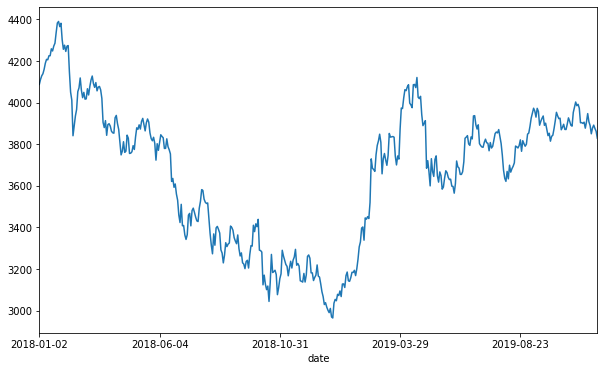

In [27]:
hs300['close'].plot(figsize=(10, 6))

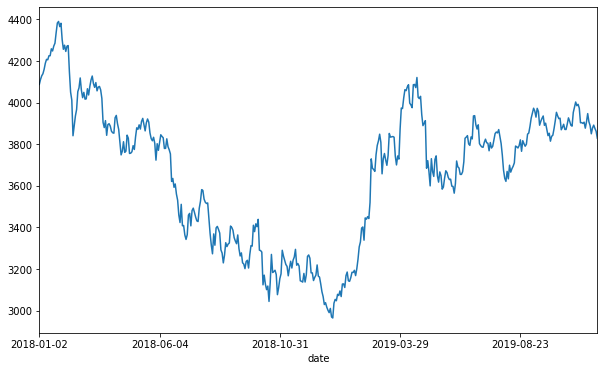

In [28]:
hs300.close.plot(figsize=(10, 6))     #等价；

In [30]:
data = ts.get_k_data('000063') #默认前复权价格；
data.head()

,date,open,close,high,low,volume,code
0,2017-02-16,15.35,15.40,15.49,15.26,172203.0,000063
1,2017-02-17,15.40,15.18,15.46,15.11,199632.0,000063
2,2017-02-20,15.22,15.68,15.74,15.21,424820.0,000063
3,2017-02-21,15.67,15.71,15.78,15.49,255652.0,000063
4,2017-02-22,15.69,15.52,15.70,15.49,325027.0,000063


In [31]:
data2 = ts.get_k_data('000063', autype='hfq') #不复权
data2.head()

,date,open,close,high,low,volume,code
0,2017-02-16,193.756,194.387,195.523,192.620,172203.0,000063
1,2017-02-17,194.387,191.610,195.144,190.726,199632.0,000063
2,2017-02-20,192.115,197.921,198.678,191.988,424820.0,000063
3,2017-02-21,197.795,198.300,199.183,195.523,255652.0,000063
4,2017-02-22,198.047,195.901,198.173,195.523,325027.0,000063


In [32]:
data3 = ts.get_k_data('000063', ktype = '5') #两个日期之间的前复权数据
data3.head()

,date,open,close,high,low,volume,amount,turnoverratio,code
0,2019-11-25 14:55,30.33,30.39,30.39,30.33,15704.0,{},4.5737,000063
1,2019-11-25 15:00,30.39,30.41,30.41,30.38,10593.0,{},3.0851,000063
2,2019-11-26 09:35,30.41,30.58,30.61,30.41,23361.0,{},6.8037,000063
3,2019-11-26 09:40,30.58,30.70,30.74,30.54,19380.0,{},5.6443,000063
4,2019-11-26 09:45,30.70,30.70,30.71,30.58,14055.0,{},4.0934,000063


In [33]:
data = ts.get_k_data(['000063','000001'])    #tushare API接口不支持多股票数据；
data

""


#### Tushare获得历史逐笔交易数据

In [35]:
df = ts.get_tick_data('000063',date='2018-07-28')    #get_tick_data()
df.sort_index(inplace = True, ascending = False)
df.head(10)

AttributeError: 'NoneType' object has no attribute 'sort_index'

#### Tushare获得当前主流指数列表

In [36]:
df = ts.get_index()
df.head()   #显示部分主流指数

,code,name,change,open,preclose,close,high,low,volume,amount
0,000001,上证指数,0.04,2908.9439,2914.4775,2915.5413,2916.9945,2902.7896,125636878,1331.1263
1,000002,Ａ股指数,0.04,3048.0403,3053.8645,3054.9893,3056.5179,3041.6013,125563864,1330.7275
2,000003,Ｂ股指数,-0.11,245.1355,244.7040,244.4436,245.1446,244.0770,73014,0.3987
3,000008,综合指数,-0.06,2825.7879,2831.3187,2829.6618,2831.9249,2819.0101,23552310,212.0934
4,000009,上证380,0.25,4592.8650,4599.2876,4610.7197,4611.1738,4579.5703,24650835,277.6081


#### Tushare获得股票的基本面信息

In [37]:
df = ts.get_stock_basics()         #基本面数据
date = df.ix['600848']['timeToMarket']
date

timeout: timed out

In [38]:
date = df.loc['600030']['timeToMarket']        #ix即将要被取消；
date

KeyError: '600030'

#### 获得所有股票基本面数据

In [39]:
data = ts.get_stock_basics()     #get_stocl_basics()
data.head()

,name,industry,area,pe,outstanding,totals,totalAssets,liquidAssets,fixedAssets,reserved,...,bvps,pb,timeToMarket,undp,perundp,rev,profit,gpr,npr,holders
code,,,,,,,,,,,,,,,,,,,,,
688258,N卓易,软件服务,江苏,187.53,0.20,0.87,3.99,2.94,0.56,0.69,...,9.59,5.76,20191209,1.71,1.97,0.0,0.0,48.88,14.46,20266.0
688198,N佰仁,医疗保健,北京,53.39,0.20,0.96,2.60,2.04,0.41,0.98,...,7.82,4.53,20191209,0.71,0.74,0.0,0.0,91.35,44.79,20216.0
688001,华兴源创,专用机械,江苏,64.61,0.36,4.01,21.24,17.49,3.21,11.52,...,4.74,8.31,20190722,3.29,0.82,0.0,0.0,48.82,18.46,16990.0
688368,晶丰明源,半导体,上海,50.41,0.14,0.62,5.48,5.21,0.03,0.91,...,18.01,4.19,20191014,1.66,2.69,0.0,0.0,23.15,11.27,15123.0
688088,虹软科技,软件服务,浙江,98.37,0.38,4.06,26.80,26.28,0.15,18.71,...,5.99,7.64,20190722,1.67,0.41,0.0,0.0,94.15,34.32,18197.0


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3755 entries, 688258 to 002970
Data columns (total 22 columns):
name                3755 non-null object
industry            3755 non-null object
area                3755 non-null object
pe                  3755 non-null float64
outstanding         3755 non-null float64
totals              3755 non-null float64
totalAssets         3755 non-null float64
liquidAssets        3755 non-null float64
fixedAssets         3755 non-null float64
reserved            3755 non-null float64
reservedPerShare    3755 non-null float64
esp                 3755 non-null float64
bvps                3755 non-null float64
pb                  3755 non-null float64
timeToMarket        3755 non-null int64
undp                3755 non-null float64
perundp             3755 non-null float64
rev                 3755 non-null float64
profit              3755 non-null float64
gpr                 3755 non-null float64
npr                 3755 non-null float64
holders       

In [ ]:
data.ix['600030'][['pe','esp']]     #pandas数据选择的复习；

In [ ]:
data.loc['600030'][['pe','esp']]

In [41]:
data = ts.get_profit_data(2017,1)    #获得公司盈利数据；

[Getting data:]###########################################################

In [42]:
data.head()

,code,name,roe,net_profit_ratio,gross_profit_rate,net_profits,eps,business_income,bips
0,600423,*ST柳化,215.12,10.30,-1.3970,40.6863,0.1018,394.6887,0.9883
1,600306,商业城,71.97,71.48,17.3030,171.9346,0.9651,240.5080,1.3501
2,000717,韶钢松山,26.83,3.19,6.2247,168.1588,0.0695,5268.7636,2.1776
3,600133,东湖高新,26.81,55.22,11.6396,686.8356,1.0828,1243.7266,1.9609
4,002893,华通热力,25.83,21.81,32.2225,112.7380,1.2526,516.6846,5.7409


In [43]:
data.set_index('code', inplace = True)

In [44]:
data.head()

,name,roe,net_profit_ratio,gross_profit_rate,net_profits,eps,business_income,bips
code,,,,,,,,
600423,*ST柳化,215.12,10.30,-1.3970,40.6863,0.1018,394.6887,0.9883
600306,商业城,71.97,71.48,17.3030,171.9346,0.9651,240.5080,1.3501
000717,韶钢松山,26.83,3.19,6.2247,168.1588,0.0695,5268.7636,2.1776
600133,东湖高新,26.81,55.22,11.6396,686.8356,1.0828,1243.7266,1.9609
002893,华通热力,25.83,21.81,32.2225,112.7380,1.2526,516.6846,5.7409


In [45]:
data.ix['600030'][['roe','net_profit_ratio']]

KeyError: '600030'

#### 获得非结构化新闻、舆情数据

In [47]:
ts.get_latest_news(top=5,show_content=True) #显示最新5条新闻，并打印出新闻内容

list index out of range


#### 获取龙虎榜信息

In [48]:
top_list = ts.top_list('2019-08-11')
top_list.head()

AttributeError: 'NoneType' object has no attribute 'head'

### 2.4 常用：优矿

可以通过优矿下载数据，并保存成CSV文件下载再导入；

In [ ]:
# 获得某一只当天的tick数据；
data=DataAPI.MktTickRTIntraDayGet(securityID=u"000001.XSHE",startTime=u"09:30",endTime=u"15:00",field=u"",pandas="1")
data.to_csv('tick_data.csv')   #下载并保存数据以供分析；

In [ ]:
# 获得某一些股票具体某一天的因子数据；
DataAPI.MktStockFactorsOneDayGet(tradeDate=u"20170630",secID=u"",ticker=u"000001,600030",field=u"ticker,ROE,PE,PB",pandas="1")

In [ ]:
#某一只股票一段时间之内的因子数据；
DataAPI.MktStockFactorsDateRangeGet(secID=u"",ticker=u"000001",beginDate=u"20100101",endDate=u"20170616",field=u"tradeDate,ROE,PE,PB",pandas="1")

In [ ]:
# 获取交易日历
start_date = '2014-01-01'
end_date = '2017-07-01'
trading_date = DataAPI.TradeCalGet(exchangeCD=u"XSHG",beginDate=u"",endDate=u"",field=u"",pandas="1")
# trading_date.to_csv('trading_date.csv')
# 筛选2013年到2016年每月最后一个交易日的日期
print(trading_date)
month_end = trading_date[(trading_date['isMonthEnd']==1) & (trading_date['calendarDate']>start_date) & (trading_date['calendarDate']<end_date)]['calendarDate'].tolist()
print month_end

In [ ]:
# 获取某个日期以前上市的，正常交易或暂停交易的股票代码，格式为xxxxxx.XSHE或xxxxxx.XSHG
date = '2017-10-01'
stock_basics = DataAPI.EquGet(equTypeCD=u"A",secID=u"",ticker=u"",listStatusCD=u"",field=u"",pandas="1")
# stock_basics.to_csv('data/stock_basics.csv', encoding='GB18030')
valid_stocks = stock_basics.loc[(stock_basics['listDate']<date) & (stock_basics['listStatusCD'].isin(['L','S']))]['secID']
# valid_stocks.to_csv('data/valid_stocks.csv', encoding='GB18030')
print valid_stocks

In [ ]:
# 获取对应股票在对应日期的多个因子值
import pandas as pd

mkt_value = [DataAPI.MktStockFactorsOneDayGet(tradeDate=date,secID=valid_stocks,ticker=u"",field=["secID", 'LCAP','PE', 'REVS20', 'tradeDate'],pandas="1").set_index(['tradeDate', 'secID']) for date in month_end]
lcap = pd.concat(mkt_value, axis=0)
# lcap.to_csv('data/raw_factors.csv')
print lcap.head(5)

In [ ]:
# 每个月最后一个交易日计算市值最小的20只股票
import pandas as pd

min_cap_pool = {date: lcap['LCAP'][date].sort_values(ascending=True).index[:20] for date in month_end}
min_cap_pool = pd.DataFrame(min_cap_pool)
print min_cap_pool

## 3. 数据存储

HDF5

Hierarchical Data Format(HDF)是一种针对大量数据进行组织和存储的文件格式。

经历了20多年的发展，HDF格式的最新版本是HDF5

In [49]:
import numpy as np
import pandas as pd
import tushare as ts

In [50]:
%time data = np.random.randn(500000,10)

Wall time: 269 ms


In [51]:
data.shape

(500000, 10)

In [52]:
data = pd.DataFrame(data)

In [53]:
data.head()

,0,1,2,3,4,5,6,7,8,9
0,1.591894,-0.259151,0.315103,-0.734911,0.389533,0.415286,0.938014,2.018578,-1.022209,0.902961
1,-0.228857,0.302140,-0.857496,-0.154719,0.507070,-2.598459,2.417057,0.440259,-0.309209,-0.767496
2,-0.531385,-1.109674,0.041701,-1.950357,-1.923518,1.038020,0.212750,-0.118140,-0.251902,0.605532
3,0.138430,0.083011,0.146764,-0.022406,1.464848,0.621666,1.061719,-0.481717,-0.344630,-0.380410
4,-0.323250,1.563257,0.424196,-0.105264,-1.627555,0.101447,-0.462196,0.056971,-0.487411,-0.774650


In [57]:
hdf5 = pd.HDFStore('data/random_number.h5', 'w')        #pd.HDFStore(),'w':write模式；知识生成了HDF5对象/文件；

OSError: ``data`` does not exist

In [56]:
hdf5.      #tab

SyntaxError: invalid syntax (<ipython-input-56-b99f4f33961f>, line 1)

In [11]:
hdf5.open()       #打开刚刚创建的HDF5的文件；

In [12]:
hdf5['data'] = data      #设置主键的名字，名字叫做data；把data随机数数据已经存进HDF5文件；

In [13]:
hdf5.close()

In [14]:
hdf5 = pd.HDFStore('data/random_number.h5', 'r')      #'r'读取模式；

In [15]:
data_read = hdf5['data']     #读取hdf5中的数据并赋值给data_read

In [16]:
data_read.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.205942,-0.280256,-1.671727,0.364285,-0.488249,-0.060461,1.861852,0.744359,0.818997,0.458245
1,-0.801891,0.102070,1.293319,1.254277,1.067564,0.261026,-1.077104,-0.274136,0.190381,-0.441855
2,0.236176,0.521590,1.321235,0.920120,-0.474281,0.037810,-0.636843,0.017675,0.768869,2.340724
3,-1.037212,-1.046202,1.970948,0.894232,-0.475212,2.401837,-0.893403,0.426868,-0.896778,-0.355959
4,1.148933,1.075020,-1.818066,1.162867,1.581717,0.681554,-0.607851,2.105613,1.508517,0.488335


In [17]:
hdf5.close()

In [20]:
profit_data = ts.get_profit_data(2017,1)

[Getting data:]#######################################################

In [21]:
profit_data.head()

,code,name,roe,net_profit_ratio,gross_profit_rate,net_profits,eps,business_income,bips
0,600423,*ST柳化,215.12,10.30,-1.3970,40.6863,0.1018,394.6887,0.9883
1,600306,商业城,71.97,71.48,17.3030,171.9346,0.9651,240.5080,1.3501
2,000717,韶钢松山,26.83,3.19,6.2247,168.1588,0.0695,5268.7636,2.1776
3,600133,东湖高新,26.81,55.22,11.6396,686.8356,1.0828,1243.7266,1.9609
4,600354,敦煌种业,23.40,302.21,25.0654,273.7035,0.5185,90.5655,0.1715


In [22]:
profit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3289 entries, 0 to 3288
Data columns (total 9 columns):
code                 3289 non-null object
name                 3289 non-null object
roe                  3281 non-null float64
net_profit_ratio     3284 non-null float64
gross_profit_rate    3284 non-null float64
net_profits          3288 non-null float64
eps                  3288 non-null float64
business_income      3288 non-null float64
bips                 3288 non-null float64
dtypes: float64(7), object(2)
memory usage: 231.3+ KB


In [23]:
hdf5 = pd.HDFStore('profit_data.h5', 'w')

In [24]:
hdf5['data'] = profit_data     #把刚刚从tushare上调取的利润数据存进HDF5文件里；

In [25]:
hdf5.close()

In [27]:
hdf5 = pd.HDFStore('profit_data.h5', 'r')

In [28]:
data_profit = hdf5['data']

In [29]:
data_profit.head(5)

,code,name,roe,net_profit_ratio,gross_profit_rate,net_profits,eps,business_income,bips
0,600423,*ST柳化,215.12,10.30,-1.3970,40.6863,0.1018,394.6887,0.9883
1,600306,商业城,71.97,71.48,17.3030,171.9346,0.9651,240.5080,1.3501
2,000717,韶钢松山,26.83,3.19,6.2247,168.1588,0.0695,5268.7636,2.1776
3,600133,东湖高新,26.81,55.22,11.6396,686.8356,1.0828,1243.7266,1.9609
4,600354,敦煌种业,23.40,302.21,25.0654,273.7035,0.5185,90.5655,0.1715


In [30]:
data_profit[data_profit['roe']>15].head()

,code,name,roe,net_profit_ratio,gross_profit_rate,net_profits,eps,business_income,bips
0,600423,*ST柳化,215.12,10.30,-1.3970,40.6863,0.1018,394.6887,0.9883
1,600306,商业城,71.97,71.48,17.3030,171.9346,0.9651,240.5080,1.3501
2,000717,韶钢松山,26.83,3.19,6.2247,168.1588,0.0695,5268.7636,2.1776
3,600133,东湖高新,26.81,55.22,11.6396,686.8356,1.0828,1243.7266,1.9609
4,600354,敦煌种业,23.40,302.21,25.0654,273.7035,0.5185,90.5655,0.1715


In [31]:
data_profit[(data_profit['roe']>15) & (data_profit['net_profit_ratio']>20)]      #数据库调取数据并进行多条件选股；


,code,name,roe,net_profit_ratio,gross_profit_rate,net_profits,eps,business_income,bips
1,600306,商业城,71.97,71.48,17.3030,171.9346,0.9651,240.5080,1.3501
3,600133,东湖高新,26.81,55.22,11.6396,686.8356,1.0828,1243.7266,1.9609
4,600354,敦煌种业,23.40,302.21,25.0654,273.7035,0.5185,90.5655,0.1715
5,600225,*ST松江,22.84,146.43,24.9719,423.3024,0.4524,289.0652,0.3089
6,600230,沧州大化,21.94,39.66,55.6318,424.8125,1.4440,1070.9230,3.6402
7,600338,西藏珠峰,20.28,53.09,70.4140,305.8753,0.4684,576.0689,0.8821
8,000036,华联控股,18.32,42.51,71.4131,758.4114,0.6643,1783.7509,1.5625
9,300288,朗玛信息,18.30,85.96,26.9264,240.8041,0.7125,280.1342,0.8289
10,600291,西水股份,17.53,22.32,26.3018,2117.8868,1.9375,9488.7197,8.6808
13,600633,浙数文化,16.31,192.98,43.5107,1259.7513,0.9676,652.7781,0.5013


声明：本资料仅限内部研究使用，切勿外传。